In [1]:
import bamboolib as bam #easy to do data manipulation and highly recommend going to https://bamboolib.8080labs.com/ and that will help you follow along
import pandas as pd #data manipulation
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df =pd.read_csv(r'C:\Users\sreed\Downloads\week 4 - Nashville_housing_data.csv')

df

       Unnamed: 0        Parcel ID       Land Use       Property Address  \
0               1  105 11 0 080.00  SINGLE FAMILY       1802  STEWART PL   
1               2  118 03 0 130.00  SINGLE FAMILY      2761  ROSEDALE PL   
2               3  119 01 0 479.00  SINGLE FAMILY      224  PEACHTREE ST   
3               4  119 05 0 186.00  SINGLE FAMILY          316  LUTIE ST   
4               5  119 05 0 387.00  SINGLE FAMILY       2626  FOSTER AVE   
...           ...              ...            ...                    ...   
22646       56602  176 01 0 003.00  SINGLE FAMILY     4617 ROCKLAND  TRL   
22647       56605  176 05 0 070.00  SINGLE FAMILY      5004 SUNSHINE  DR   
22648       56607  176 09 0 003.00  SINGLE FAMILY  4964 HICKORY WOODS  E   
22649       56614  082 05 0 040.00  SINGLE FAMILY        1625 5TH  AVE N   
22650       56615  082 05 0 058.00  SINGLE FAMILY        1614 5TH  AVE N   

       Suite/ Condo   # Property City   Sale Date   Legal Reference  \
0               

Drop the column unnamed, parcel id, property address and suit/condo from analysis

In [3]:
df = df.drop(columns=['Unnamed: 0','Suite/ Condo   #'])


In [4]:
df = df.dropna(subset=['Property Address'])
df[['Finished Area']] = df[['Finished Area']].fillna(df[['Finished Area']].median())
df[['Half Bath']] = df[['Half Bath']].fillna(df[['Half Bath']].median())



df

             Parcel ID       Land Use       Property Address Property City  \
0      105 11 0 080.00  SINGLE FAMILY       1802  STEWART PL     NASHVILLE   
1      118 03 0 130.00  SINGLE FAMILY      2761  ROSEDALE PL     NASHVILLE   
2      119 01 0 479.00  SINGLE FAMILY      224  PEACHTREE ST     NASHVILLE   
3      119 05 0 186.00  SINGLE FAMILY          316  LUTIE ST     NASHVILLE   
4      119 05 0 387.00  SINGLE FAMILY       2626  FOSTER AVE     NASHVILLE   
...                ...            ...                    ...           ...   
22646  176 01 0 003.00  SINGLE FAMILY     4617 ROCKLAND  TRL       ANTIOCH   
22647  176 05 0 070.00  SINGLE FAMILY      5004 SUNSHINE  DR       ANTIOCH   
22648  176 09 0 003.00  SINGLE FAMILY  4964 HICKORY WOODS  E       ANTIOCH   
22649  082 05 0 040.00  SINGLE FAMILY        1625 5TH  AVE N     NASHVILLE   
22650  082 05 0 058.00  SINGLE FAMILY        1614 5TH  AVE N     NASHVILLE   

        Sale Date   Legal Reference Sold As Vacant  \
0       1

In [5]:
df[['Full Bath']] = df[['Full Bath']].fillna(df[['Full Bath']].median())
df[['Bedrooms']] = df[['Bedrooms']].fillna(df[['Bedrooms']].median())

In [6]:
df

             Parcel ID       Land Use       Property Address Property City  \
0      105 11 0 080.00  SINGLE FAMILY       1802  STEWART PL     NASHVILLE   
1      118 03 0 130.00  SINGLE FAMILY      2761  ROSEDALE PL     NASHVILLE   
2      119 01 0 479.00  SINGLE FAMILY      224  PEACHTREE ST     NASHVILLE   
3      119 05 0 186.00  SINGLE FAMILY          316  LUTIE ST     NASHVILLE   
4      119 05 0 387.00  SINGLE FAMILY       2626  FOSTER AVE     NASHVILLE   
...                ...            ...                    ...           ...   
22646  176 01 0 003.00  SINGLE FAMILY     4617 ROCKLAND  TRL       ANTIOCH   
22647  176 05 0 070.00  SINGLE FAMILY      5004 SUNSHINE  DR       ANTIOCH   
22648  176 09 0 003.00  SINGLE FAMILY  4964 HICKORY WOODS  E       ANTIOCH   
22649  082 05 0 040.00  SINGLE FAMILY        1625 5TH  AVE N     NASHVILLE   
22650  082 05 0 058.00  SINGLE FAMILY        1614 5TH  AVE N     NASHVILLE   

        Sale Date   Legal Reference Sold As Vacant  \
0       1

In [7]:
df['Foundation Type'].fillna('CRAWL', inplace=True)
df

             Parcel ID       Land Use       Property Address Property City  \
0      105 11 0 080.00  SINGLE FAMILY       1802  STEWART PL     NASHVILLE   
1      118 03 0 130.00  SINGLE FAMILY      2761  ROSEDALE PL     NASHVILLE   
2      119 01 0 479.00  SINGLE FAMILY      224  PEACHTREE ST     NASHVILLE   
3      119 05 0 186.00  SINGLE FAMILY          316  LUTIE ST     NASHVILLE   
4      119 05 0 387.00  SINGLE FAMILY       2626  FOSTER AVE     NASHVILLE   
...                ...            ...                    ...           ...   
22646  176 01 0 003.00  SINGLE FAMILY     4617 ROCKLAND  TRL       ANTIOCH   
22647  176 05 0 070.00  SINGLE FAMILY      5004 SUNSHINE  DR       ANTIOCH   
22648  176 09 0 003.00  SINGLE FAMILY  4964 HICKORY WOODS  E       ANTIOCH   
22649  082 05 0 040.00  SINGLE FAMILY        1625 5TH  AVE N     NASHVILLE   
22650  082 05 0 058.00  SINGLE FAMILY        1614 5TH  AVE N     NASHVILLE   

        Sale Date   Legal Reference Sold As Vacant  \
0       1

Removing columns which are not required for further analysis

In [8]:
y = df.drop(columns=['Parcel ID','Property Address','Sale Date','Legal Reference','Year Built','City'])

Convert into dummy variables

In [9]:
y = pd.get_dummies(y, columns=['Land Use', 'Property City', 'Sold As Vacant', 'Multiple Parcels Involved in Sale', 'State','Tax District','Foundation Type','Exterior Wall','Grade'], drop_first=True, dummy_na=False)


Convert under priced to 1 and over priced to 0

In [10]:
y['Sale Price Compared To Value'] = y['Sale Price Compared To Value'].map({'Under': 1, 'Over': 0})


In [11]:
y

       Acreage  Neighborhood  Land Value  Building Value  Finished Area  \
0         0.17          3127       32000          134400     1149.00000   
1         0.11          9126       34000          157800     2090.82495   
2         0.17          3130       25000          243700     2145.60001   
3         0.34          3130       25000          138100     1969.00000   
4         0.17          3130       25000           86100     1037.00000   
...        ...           ...         ...             ...            ...   
22646     0.38          6328       25000          105000     1758.00000   
22647     0.27          6328       25000          142400     2421.00000   
22648     0.23          6328       25000          159300     3117.00000   
22649     0.15           126       40000          204100     1637.00000   
22650     0.19           126       40000          295900     2478.00000   

       Bedrooms  Full Bath  Half Bath  Sale Price Compared To Value  \
0           2.0        1.0  

In [12]:
y

       Acreage  Neighborhood  Land Value  Building Value  Finished Area  \
0         0.17          3127       32000          134400     1149.00000   
1         0.11          9126       34000          157800     2090.82495   
2         0.17          3130       25000          243700     2145.60001   
3         0.34          3130       25000          138100     1969.00000   
4         0.17          3130       25000           86100     1037.00000   
...        ...           ...         ...             ...            ...   
22646     0.38          6328       25000          105000     1758.00000   
22647     0.27          6328       25000          142400     2421.00000   
22648     0.23          6328       25000          159300     3117.00000   
22649     0.15           126       40000          204100     1637.00000   
22650     0.19           126       40000          295900     2478.00000   

       Bedrooms  Full Bath  Half Bath  Sale Price Compared To Value  \
0           2.0        1.0  

In [13]:
for col in y.columns:
    print(col)

Acreage
Neighborhood
Land Value
Building Value
Finished Area
Bedrooms
Full Bath
Half Bath
Sale Price Compared To Value
Land Use_QUADPLEX
Land Use_RESIDENTIAL COMBO/MISC
Land Use_SINGLE FAMILY
Property City_BRENTWOOD
Property City_GOODLETTSVILLE
Property City_HERMITAGE
Property City_JOELTON
Property City_MADISON
Property City_MOUNT JULIET
Property City_NASHVILLE
Property City_OLD HICKORY
Property City_WHITES CREEK
Sold As Vacant_Yes
Multiple Parcels Involved in Sale_Yes
Tax District_CITY OF BERRY HILL
Tax District_CITY OF FOREST HILLS
Tax District_CITY OF GOODLETTSVILLE
Tax District_CITY OF OAK HILL
Tax District_GENERAL SERVICES DISTRICT
Tax District_URBAN SERVICES DISTRICT
Foundation Type_FULL BSMT
Foundation Type_PIERS
Foundation Type_PT BSMT
Foundation Type_SLAB
Foundation Type_TYPICAL
Exterior Wall_BRICK/FRAME
Exterior Wall_CONC BLK
Exterior Wall_FRAME
Exterior Wall_FRAME/STONE
Exterior Wall_LOG
Exterior Wall_METAL
Exterior Wall_STONE
Exterior Wall_STUCCO
Grade_AAB 
Grade_B   
Grade

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
test = y.drop(['Tax District_URBAN SERVICES DISTRICT','Finished Area','Foundation Type_TYPICAL','Bedrooms','Land Use_SINGLE FAMILY','Property City_NASHVILLE'],axis=1)
vif_data["feature"] = test.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(test.values, i)
                        for i in range(len(test.columns))]
  
print(vif_data)

                                   feature        VIF
0                                  Acreage   2.297409
1                             Neighborhood  11.084127
2                               Land Value   3.362973
3                           Building Value   6.347791
4                                Full Bath   9.960155
5                                Half Bath   1.653249
6             Sale Price Compared To Value   1.371415
7                        Land Use_QUADPLEX   1.030664
8          Land Use_RESIDENTIAL COMBO/MISC   1.010228
9                  Property City_BRENTWOOD   1.050870
10            Property City_GOODLETTSVILLE   4.914973
11                 Property City_HERMITAGE   2.065855
12                   Property City_JOELTON   1.014094
13                   Property City_MADISON   2.366072
14              Property City_MOUNT JULIET   1.040916
15               Property City_OLD HICKORY   2.034103
16              Property City_WHITES CREEK   1.015884
17                      Sold

In [17]:
y_logr= y[['Sale Price Compared To Value']]
x_logr= y.drop(['Sale Price Compared To Value','Tax District_URBAN SERVICES DISTRICT','Finished Area','Foundation Type_TYPICAL','Bedrooms','Land Use_SINGLE FAMILY','Property City_NASHVILLE'],axis=1)
from sklearn.model_selection import train_test_split
x_train, x_test, z_train, z_test = train_test_split(x_logr, y_logr, test_size=0.20)

Logistic Regression

In [18]:
#import statsmodels.api as sm


#Xlog2 = sm.add_constant(x_train) 
#logr_model = sm.Logit(z_train, Xlog2) 
#logr_fit = logr_model.fit()
#print(logr_fit.summary())


         Current function value: 0.543812
         Iterations: 35


LinAlgError: Singular matrix

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import time

start_time = time.time()

lr_bal = LogisticRegression(solver = 'liblinear', random_state=0).fit(x_train,z_train)
elapsed_time = time.time() - start_time
print(f'{elapsed_time:.2f}s elapsed during training')


0.05s elapsed during training


In [20]:
lr_bal.score(x_train,z_train)
lr_bal_model=lr_bal.fit(x_train,z_train)
y_pred_cmp=lr_bal_model.predict(x_test)
print('Classification report for balanced classes \n',classification_report(z_test,y_pred_cmp))


Classification report for balanced classes 
               precision    recall  f1-score   support

           0       0.76      0.99      0.86      3428
           1       0.17      0.00      0.01      1102

    accuracy                           0.75      4530
   macro avg       0.46      0.50      0.43      4530
weighted avg       0.61      0.75      0.65      4530



In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

logreg = LogisticRegression()

logreg.fit(x_train,z_train)


z_pred=logreg.predict(x_test)
cnf_matrix = confusion_matrix(z_test, z_pred)
cnf_matrix


array([[3408,   20],
       [1098,    4]], dtype=int64)

In [23]:
y_logr= y[['Sale Price Compared To Value']]
x_logr= y[['Land Value','Building Value','Sold As Vacant_Yes']]
from sklearn.model_selection import train_test_split
x_train, x_test, z_train, z_test = train_test_split(x_logr, y_logr, test_size=0.20)

In [24]:
import statsmodels.api as sm


Xlog2 = sm.add_constant(x_train) 
logr_model = sm.Logit(z_train, Xlog2) 
logr_fit = logr_model.fit()
print(logr_fit.summary())


Optimization terminated successfully.
         Current function value: 0.549127
         Iterations 6
                                Logit Regression Results                                
Dep. Variable:     Sale Price Compared To Value   No. Observations:                18119
Model:                                    Logit   Df Residuals:                    18115
Method:                                     MLE   Df Model:                            3
Date:                          Sun, 04 Dec 2022   Pseudo R-squ.:                 0.01689
Time:                                  18:35:44   Log-Likelihood:                -9949.6
converged:                                 True   LL-Null:                       -10121.
Covariance Type:                      nonrobust   LLR p-value:                 8.731e-74
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const       

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr_bal=LogisticRegression(solver = 'liblinear')
lr_bal_model=lr_bal.fit(x_train,z_train)
y_pred_cmp=lr_bal_model.predict(x_test)
print('Classification report for balanced classes \n',classification_report(z_test,y_pred_cmp))



Classification report for balanced classes 
               precision    recall  f1-score   support

           0       0.75      1.00      0.86      3396
           1       0.00      0.00      0.00      1134

    accuracy                           0.75      4530
   macro avg       0.37      0.50      0.43      4530
weighted avg       0.56      0.75      0.64      4530



In [26]:
cnf_matrix = confusion_matrix(z_test, y_pred_cmp)
cnf_matrix


array([[3396,    0],
       [1134,    0]], dtype=int64)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr_bal = LogisticRegression(solver = 'liblinear', random_state=0).fit(x_train,z_train)
lr_bal.score(x_train,z_train)
lr_bal_model=lr_bal.fit(x_train,z_train)
y_pred_cmp=lr_bal_model.predict(x_test)
print('Classification report for balanced classes \n',classification_report(z_test,y_pred_cmp))


Classification report for balanced classes 
               precision    recall  f1-score   support

           0       0.75      1.00      0.86      3396
           1       0.00      0.00      0.00      1134

    accuracy                           0.75      4530
   macro avg       0.37      0.50      0.43      4530
weighted avg       0.56      0.75      0.64      4530



Decision tree

In [ ]:
Make dependent variable a string

In [29]:
z=y[['Sale Price Compared To Value']]
z['Sale Price Compared To Value'] = z['Sale Price Compared To Value'].astype('string')
y_d = y.drop(columns=['Sale Price Compared To Value'])


In [30]:


#Split Train/Test
from sklearn.model_selection import train_test_split
x_train, x_test, z_train, z_test = train_test_split(y_d, z, test_size=0.20)

Decision tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

start_time = time.time()

dt_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
dt_model.fit(x_train,z_train)

elapsed_time = time.time() - start_time
print(f'{elapsed_time:.2f}s elapsed during training')

0.06s elapsed during training


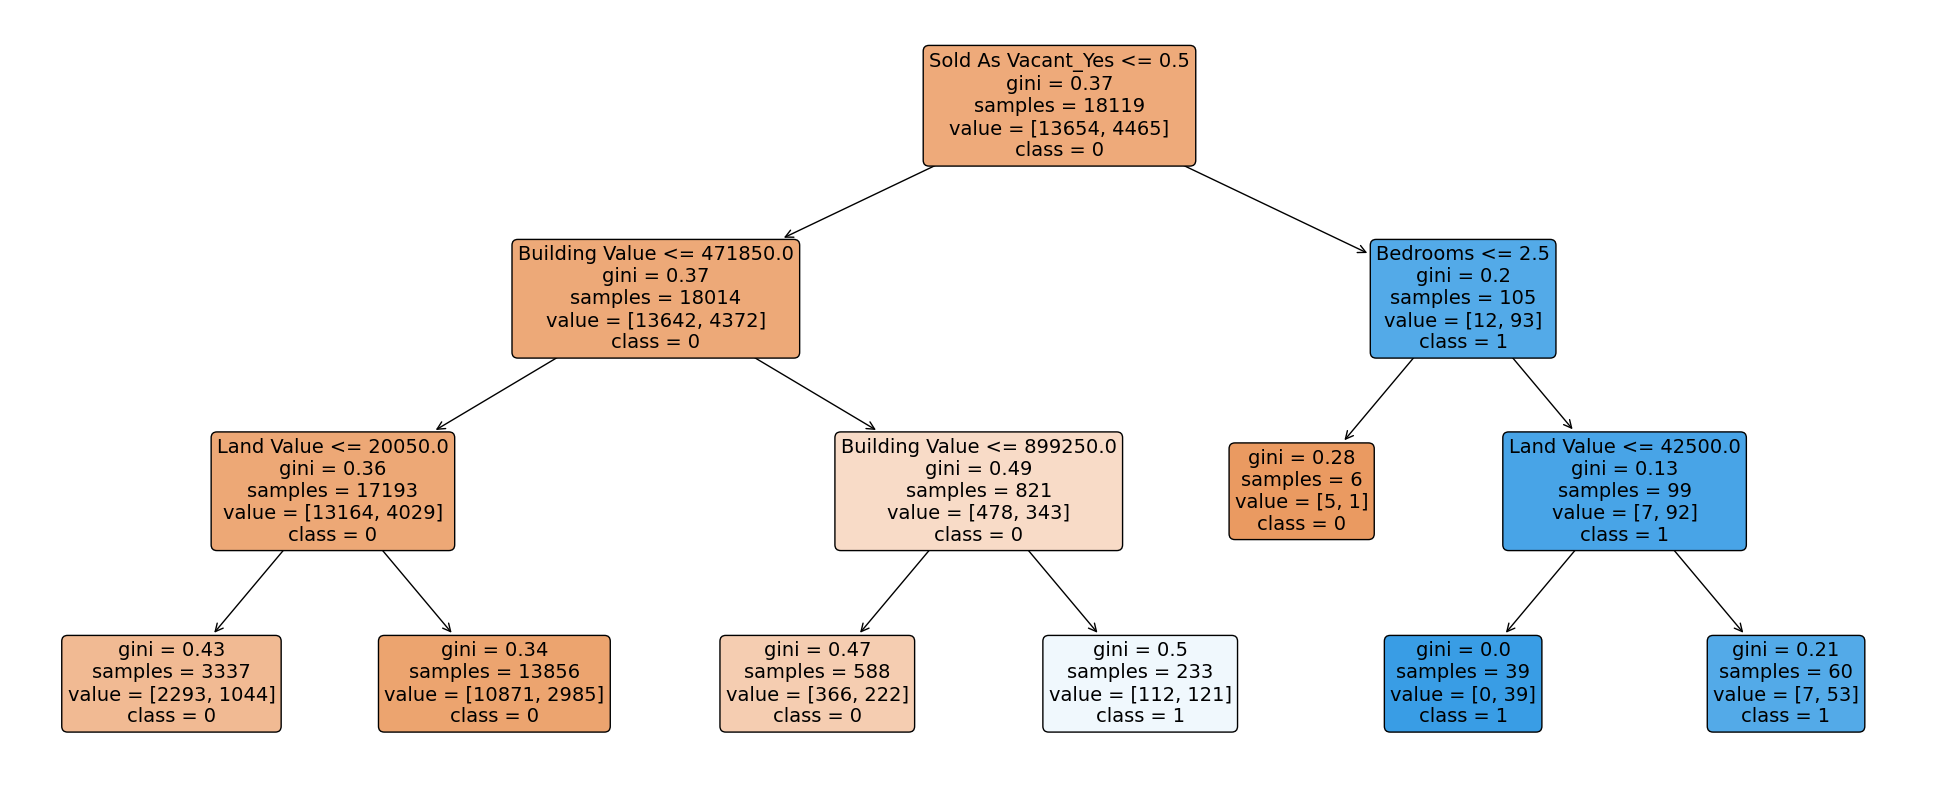

In [32]:

plt.figure(figsize = (25,10))
plot=tree.plot_tree(dt_model,feature_names = y_d.columns.values.tolist(),class_names=['0','1'],filled = True,rounded = True,fontsize = 14,precision=2)

In [33]:
#Accuracy

z_predict = dt_model.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(z_test,z_predict)

0.7538631346578366

In [34]:
#Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(z_test, z_predict))
print(classification_report(z_test, z_predict))

[[3360   33]
 [1082   55]]
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      3393
           1       0.62      0.05      0.09      1137

    accuracy                           0.75      4530
   macro avg       0.69      0.52      0.47      4530
weighted avg       0.72      0.75      0.66      4530



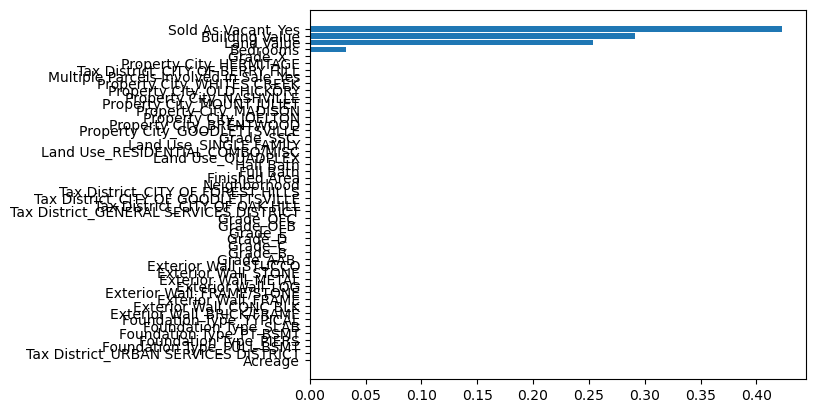

In [35]:
#Feature Importance
importances = dt_model.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])

Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
start_time = time.time()

rf_model = RandomForestClassifier(random_state=42,max_depth=4)   
rf_model.fit(x_train,z_train)
elapsed_time = time.time() - start_time
print(f'{elapsed_time:.2f}s elapsed during training')


0.88s elapsed during training


In [37]:
#Accuracy

zrf_predict = rf_model.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(z_test,zrf_predict)

0.7536423841059603

In [38]:
#Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(z_test, zrf_predict))
print(classification_report(z_test, zrf_predict))

[[3391    2]
 [1114   23]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      3393
           1       0.92      0.02      0.04      1137

    accuracy                           0.75      4530
   macro avg       0.84      0.51      0.45      4530
weighted avg       0.79      0.75      0.65      4530



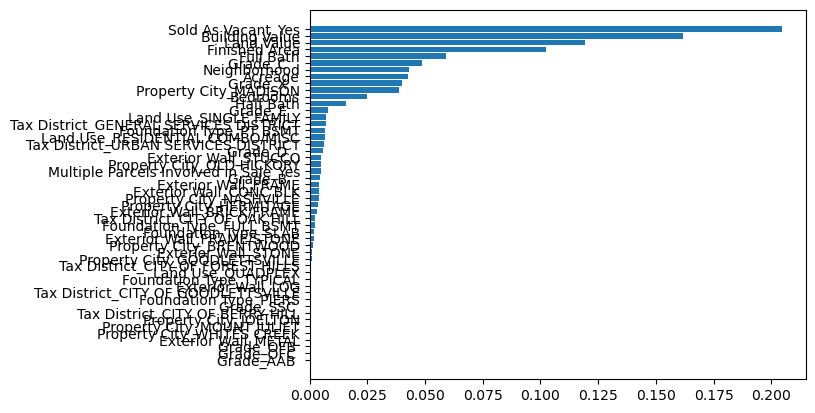

In [39]:
#Feature Importance
importances = rf_model.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])

Gradient boosting

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
start_time = time.time()

gb_model = GradientBoostingClassifier(random_state=42,max_depth=4)   
gb_model.fit(x_train,z_train)
elapsed_time = time.time() - start_time
print(f'{elapsed_time:.2f}s elapsed during training')


4.74s elapsed during training


In [41]:
#Accuracy

zgb_predict = gb_model.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(z_test,zgb_predict)

0.7556291390728477

In [42]:
#Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(z_test, zgb_predict))
print(classification_report(z_test, zgb_predict))

[[3358   35]
 [1072   65]]
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      3393
           1       0.65      0.06      0.11      1137

    accuracy                           0.76      4530
   macro avg       0.70      0.52      0.48      4530
weighted avg       0.73      0.76      0.67      4530



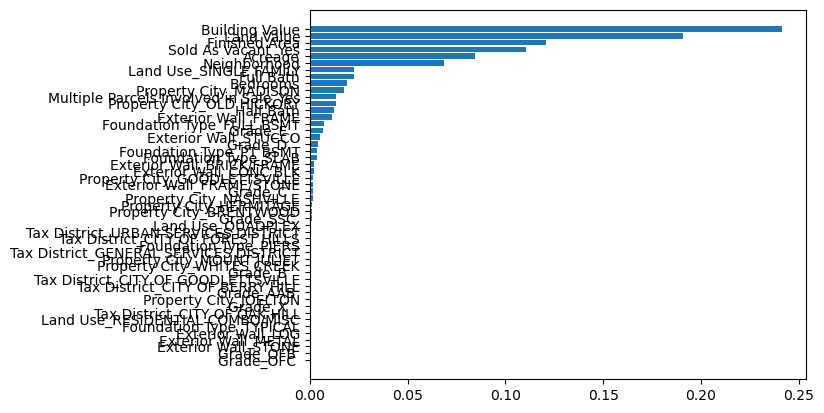

In [43]:
#Feature Importance
importances = gb_model.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])